# Handwritten Digit recognition
## 2. Using SVM classifier

In [1]:
#Loading required libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# loading MNIST dataset

train_data = pd.read_csv("D:/Classes/MA981/Dataset/train.csv", header = 0)
test_data = pd.read_csv("D:/Classes/MA981/Dataset/test.csv", header = 0)
#sample_submission_data = pd.read_csv("D:/Classes/MA981/Dataset/sample_submission.csv", header = 0)

train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# checking labels are present in training and testing datasets

labels = set(train_data['label'].tolist())
print("The labels are: {0}".format(labels))

The labels are: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [4]:
# finding label distribution

train_DS = Counter(x = train_data['label'])

print(train_DS)


#checking the data

y_train = train_data["label"]
X_train = train_data.drop(["label"],axis = 1)
X_test = test_data
#y_test = train_test_split(train_data,test_data)

Counter({'x': 0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64})


In [5]:
#Normalizing the data by dividing with 255

X_train = X_train/255.0
X_test = X_test/255.0
#y_train = y_train/255.0

In [6]:
# checking the first 5 rows of data using head()

X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# checking the first 5 rows of data using head()

y_train.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [8]:
# Checking the shape of train data

X_train.shape

(42000, 784)

In [9]:
# Checking the shape of test data

X_test.shape

(28000, 784)

In [10]:

X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 784 entries, pixel0 to pixel783
dtypes: float64(784)
memory usage: 251.2 MB


In [11]:
#statistical representation of data

X_train.describe(percentiles = [0.05,0.10,0.25,0.50,0.75,0.90,0.99])

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000860,0.000459,0.000231,0.000079,0.000068,0.000011,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.024756,0.018172,0.012841,0.006901,0.007429,0.001625,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
5%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
10%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
90%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [12]:
#distribution of all labels

y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

Text(0.5, 1.0, 'Digit 7')

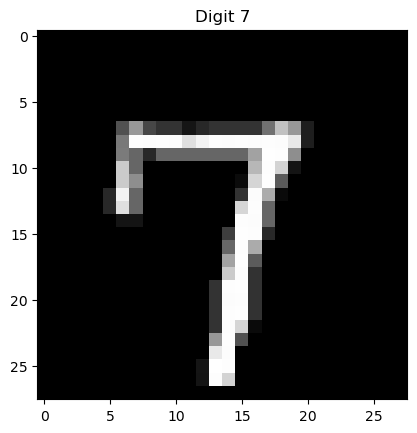

In [13]:
#loading the image with label name

seven = train_data.iloc[6, 1:]
seven.shape
seven = seven.values.reshape(28,28)
plt.imshow(seven, cmap='gray')
plt.title("Digit 7")

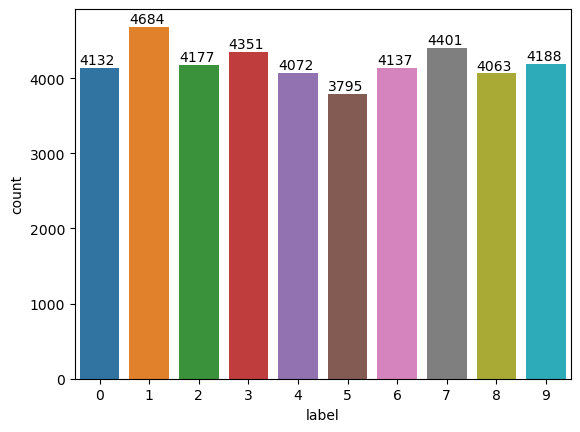

In [14]:
# plotting the labels count in the training dataset

snsplot = sns.countplot(x=train_data['label'])

for p in snsplot.patches:
    snsplot.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+50))


## Data Preparation

In [15]:
#checking the data for any null values

round(100*(X_train.isnull().sum()/(len(X_train.index))),2).sort_values(ascending = False)

pixel0      0.0
pixel515    0.0
pixel517    0.0
pixel518    0.0
pixel519    0.0
           ... 
pixel263    0.0
pixel264    0.0
pixel265    0.0
pixel266    0.0
pixel783    0.0
Length: 784, dtype: float64

Text(0, 0.5, 'Frequency')

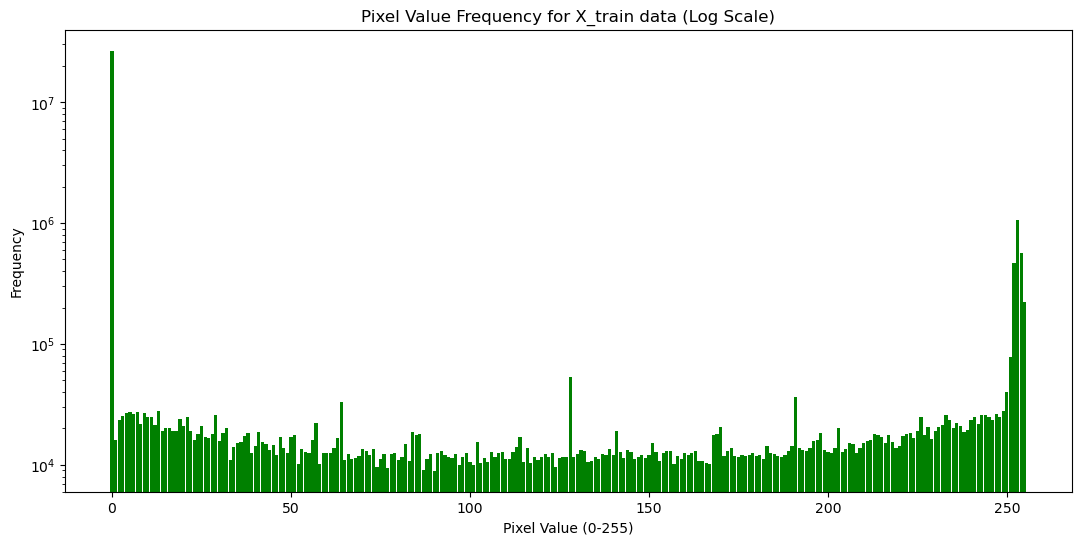

In [16]:
#creating plot to check the distribution of pixels values assigned from 0 to 255 that are contributed in overall training dataset

y = pd.value_counts(X_train.values.ravel()).sort_index()
N = len(y)
x = range(N)
width =0.9
plt.figure(figsize=[13,6])
plt.bar(x, y, width, color="green")
plt.title('Pixel Value Frequency for X_train data (Log Scale)')
plt.yscale('log')
plt.xlabel('Pixel Value (0-255)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

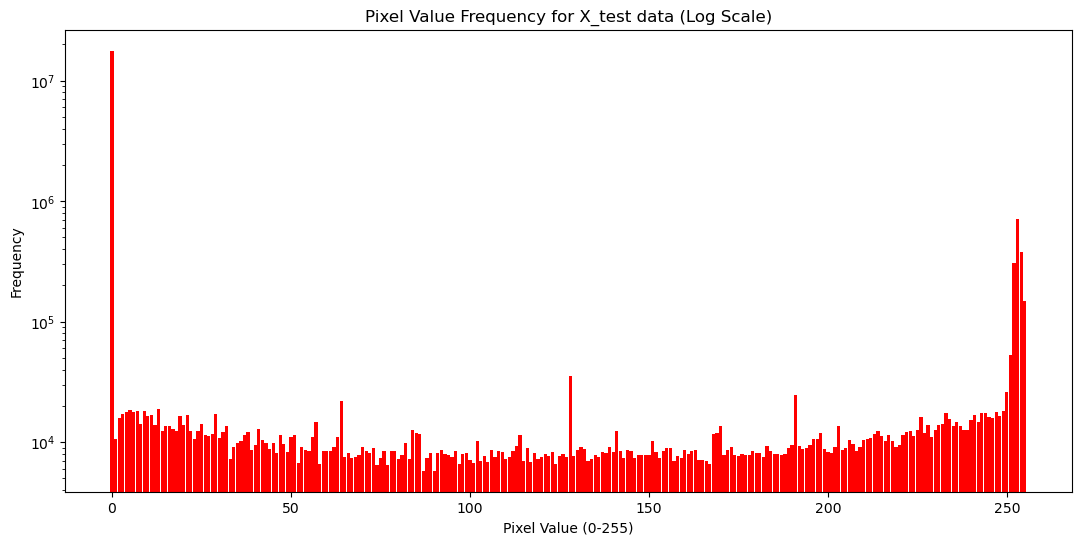

In [17]:
#creating plot to check the distribution of pixels values assigned from 0 to 255 that are contributed in overall testing dataset

y = pd.value_counts(X_test.values.ravel()).sort_index()
N = len(y)
x = range(N)
width =0.9
plt.figure(figsize=[13,6])
plt.bar(x, y, width, color="red")
plt.title('Pixel Value Frequency for X_test data (Log Scale)')
plt.yscale('log')
plt.xlabel('Pixel Value (0-255)')
plt.ylabel('Frequency')

## Splitting data

In [18]:
#splitting the data to train our model

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train, test_size = 0.30, random_state = 42)

X_train1.shape
X_test1.shape

print(f'X_train1 = {X_train1.shape}, y_train1 = {y_train1.shape}, X_test1 = {X_test1.shape}, y_test1 = {y_test1.shape}')

X_train1 = (29400, 784), y_train1 = (29400,), X_test1 = (12600, 784), y_test1 = (12600,)


## Plotting images in the dataset

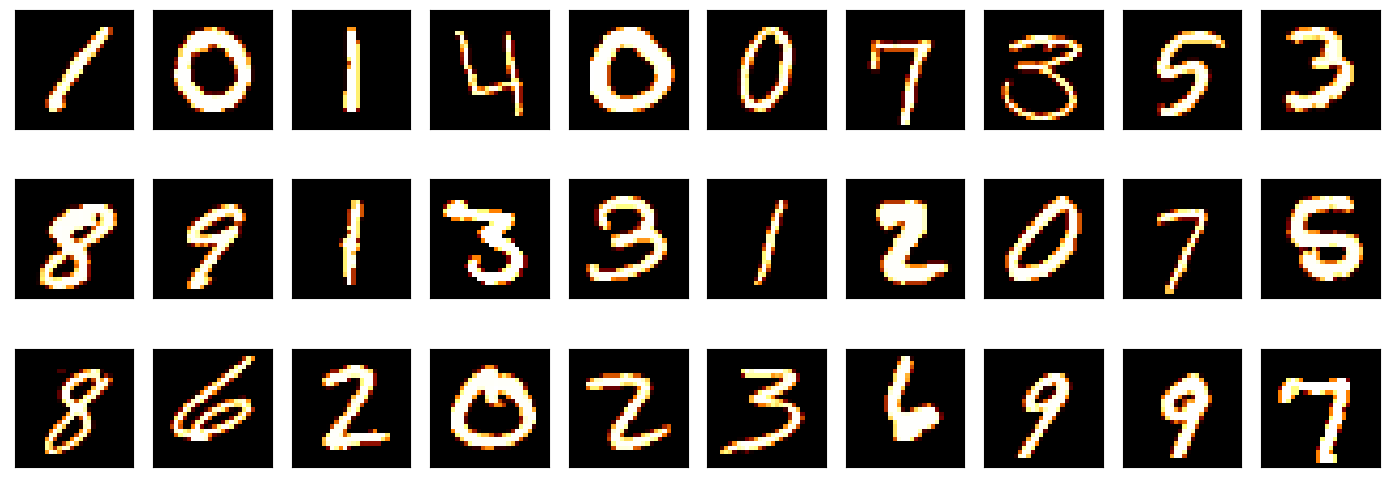

In [19]:
#plotting the images with respect to axis

plt.figure(figsize=(14,12))
for digit_num in range(0,30):
    plt.subplot(7,10,digit_num+1)
    grid_data = X_train.iloc[digit_num].values.reshape(28,28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data, interpolation = "none", cmap = "afmhot")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

In [20]:
#normalizing the data using scaler function

scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(X_train1)
normalized_X_train = scaler.transform(X_train1)
normalized_X_test = scaler.transform(X_test1)

In [21]:
#Dimensionality reduction using PCA (Principal Component Analysis)

pca = PCA(n_components=0.95)
pca_X_train = pca.fit_transform(normalized_X_train)
pca_X_test = pca.transform(normalized_X_test)
print(f'{pca.explained_variance_} \n Number of PCA Vectors = {len(pca.explained_variance_)}' )

[20.73736787 15.03926338 13.07883069 11.38666449 10.40141167  9.12357348
  6.89106027  6.09996414  5.8549627   4.93987677  4.41229236  4.32068287
  3.60688898  3.5415831   3.36030106  3.13853841  2.79248575  2.71749295
  2.50039376  2.43171861  2.26629601  2.15245484  2.0392157   1.93689949
  1.86590111  1.75413022  1.72495053  1.63616306  1.56147079  1.460876
  1.39297505  1.33491975  1.27527796  1.24578054  1.19332597  1.13906119
  1.0750047   1.02631355  0.99772951  0.98237414  0.95367697  0.9376954
  0.87715997  0.83473673  0.81158115  0.78955917  0.75778883  0.73489334
  0.70759323  0.67123719  0.6617636   0.64867531  0.61862002  0.60387087
  0.5911353   0.56487724  0.56068456  0.54341946  0.53369507  0.51806583
  0.50959351  0.50239677  0.48004696  0.47135254  0.45451387  0.43349844
  0.42535873  0.41454445  0.40819788  0.39793396  0.39148851  0.38350345
  0.37098949  0.36182099  0.34815236  0.34390774  0.33821495  0.32523067
  0.30893711  0.2996106   0.29834773  0.29581587  0.29

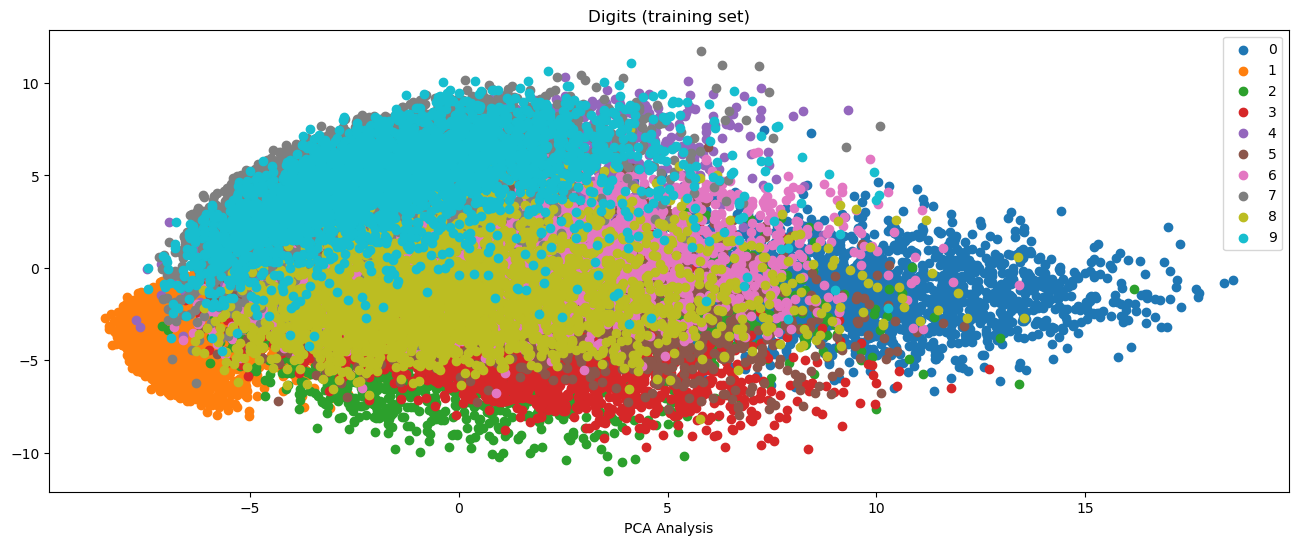

In [22]:
# Plotting PCA for different classes in dataset

f, ax = plt.subplots(1, 1)
for i in range(10):
  ax.scatter(pca_X_train[y_train1 == i, 0], pca_X_train[y_train1 == i, 1], label=i)
ax.set_xlabel("PCA Analysis")
ax.legend()
f.set_size_inches(16, 6)
ax.set_title("Digits (training set)")
plt.show()

In [23]:
#creating SVM linear model 

model_linear = svm.SVC(kernel ='linear', degree = 3, gamma ='scale')

In [24]:
# fitting the model

model_linear.fit(pca_X_train, y_train1)

SVC(kernel='linear')

In [25]:
#predicting the model with pca test data

y_predict1 = model_linear.predict(pca_X_test)

In [26]:
#checking accuracy of predicted model

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve, classification_report

print(accuracy_score(y_test1, y_predict1))

0.9317460317460318


In [27]:
#assigning confusion matrix to a variable

conf_mat1 = confusion_matrix(y_test1, y_predict1)

In [28]:
#printing accuracy of the model
#generating confusion matrix for above predicted model

print("accuracy", metrics.accuracy_score(y_test1, y_predict1), "\n")

conf_mat1

accuracy 0.9317460317460318 



array([[1159,    0,    6,    2,    2,   18,    8,    0,    3,    2],
       [   1, 1367,    2,    5,    1,    2,    0,    2,    8,    1],
       [   6,   12, 1202,   11,   16,    8,   13,    8,   15,    3],
       [   5,    8,   34, 1218,    1,   40,    4,   15,   21,    9],
       [   3,    2,    9,    3, 1154,    2,    7,    8,    2,   32],
       [  11,    5,   12,   47,    3,  973,   17,    0,   11,    6],
       [  16,    3,   17,    1,   11,   20, 1179,    1,    8,    0],
       [   3,    5,   18,   11,   15,    3,    0, 1272,    4,   28],
       [   6,   18,   16,   34,    5,   25,   10,    4, 1086,    5],
       [   7,    3,   10,    7,   27,    7,    0,   28,   12, 1130]],
      dtype=int64)

In [29]:
#generating classification report 

print(classification_report(y_test1, y_predict1))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1200
           1       0.96      0.98      0.97      1389
           2       0.91      0.93      0.92      1294
           3       0.91      0.90      0.90      1355
           4       0.93      0.94      0.94      1222
           5       0.89      0.90      0.89      1085
           6       0.95      0.94      0.95      1256
           7       0.95      0.94      0.94      1359
           8       0.93      0.90      0.91      1209
           9       0.93      0.92      0.92      1231

    accuracy                           0.93     12600
   macro avg       0.93      0.93      0.93     12600
weighted avg       0.93      0.93      0.93     12600



Text(213.25, 0.5, 'Predicted Label')

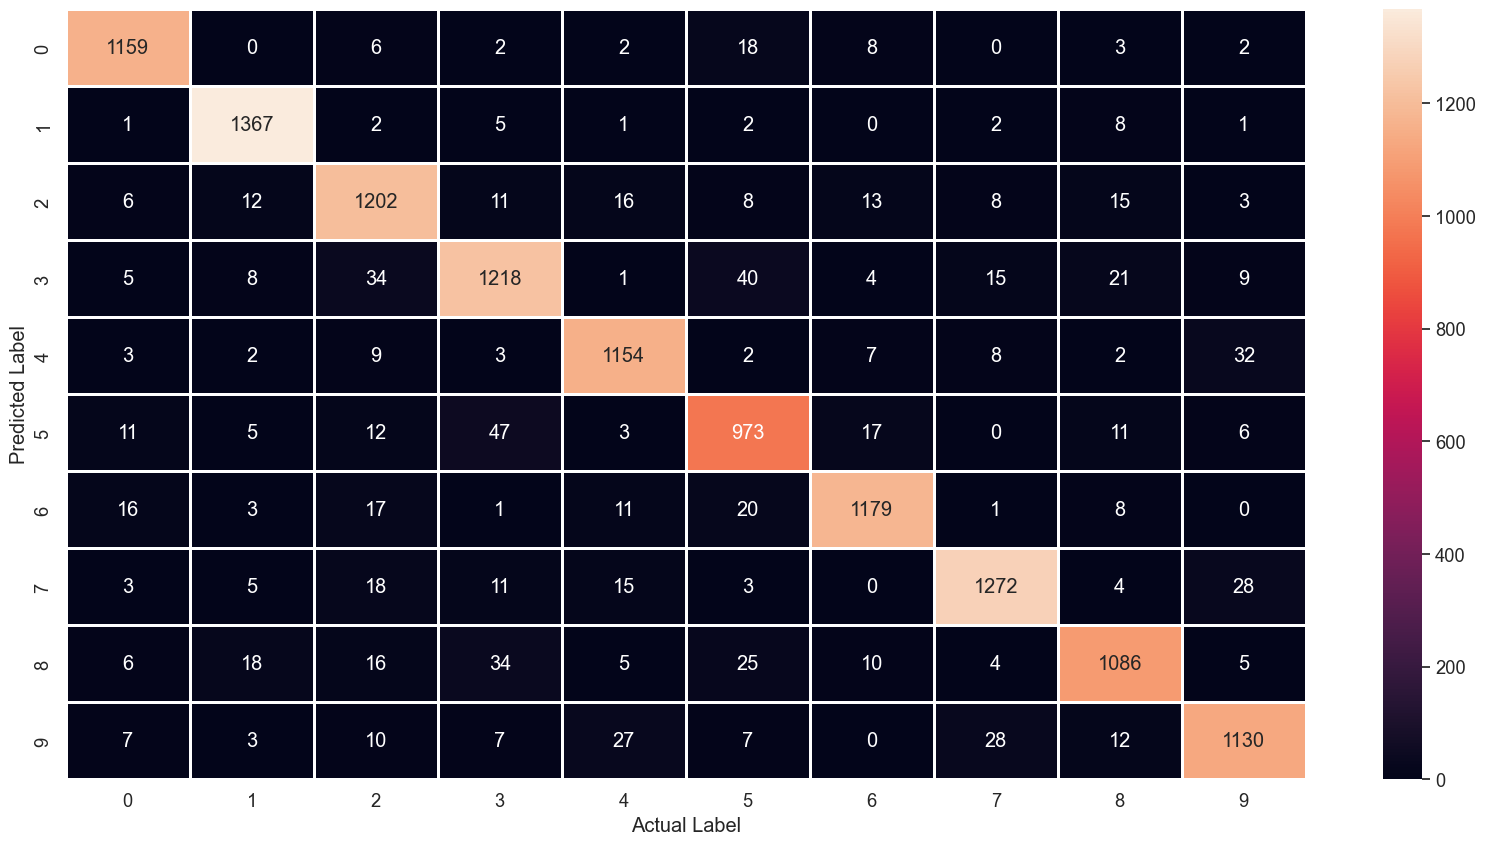

In [30]:
#plotting heatmap for the above found results of confusion matrix

plt.figure(figsize = (20,10))
sns.set(font_scale=1.2)
sns.heatmap(conf_mat1, annot=True, fmt="d", linewidths=1)
plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")

In [31]:
#creating SVM non-linear model with kernel as rbf

non_linear_model = svm.SVC(kernel ='rbf', degree = 3, gamma ='scale')

In [32]:
#fitting the the model

non_linear_model.fit(pca_X_train, y_train1)

SVC()

In [33]:
#predicting the model with pca test data

y_predict2 = non_linear_model.predict(pca_X_test)

In [34]:
#assigning confusion matrix to a variable

conf_mat2 = confusion_matrix(y_test1, y_predict2)

In [35]:
#printing the accuracy of the model
#generating confusion matrix for non linear model

print("accuracy", metrics.accuracy_score(y_test1, y_predict2), "\n")

conf_mat2

accuracy 0.978015873015873 



array([[1190,    0,    1,    0,    2,    0,    5,    0,    1,    1],
       [   0, 1381,    2,    0,    1,    1,    0,    2,    1,    1],
       [   4,    5, 1256,    4,    8,    0,    2,    6,    9,    0],
       [   1,    1,    9, 1310,    0,   10,    0,    5,   13,    6],
       [   1,    0,    3,    0, 1193,    1,    5,    2,    1,   16],
       [   1,    1,    1,   12,    1, 1060,    5,    0,    2,    2],
       [   7,    2,    2,    0,    2,    0, 1237,    0,    6,    0],
       [   0,    5,    8,    0,    7,    0,    0, 1326,    2,   11],
       [   1,    3,    3,    4,    5,    7,    0,    2, 1182,    2],
       [   6,    0,    2,   10,   14,    1,    0,    6,    4, 1188]],
      dtype=int64)

In [36]:
print(classification_report(y_test1, y_predict2))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1200
           1       0.99      0.99      0.99      1389
           2       0.98      0.97      0.97      1294
           3       0.98      0.97      0.97      1355
           4       0.97      0.98      0.97      1222
           5       0.98      0.98      0.98      1085
           6       0.99      0.98      0.99      1256
           7       0.98      0.98      0.98      1359
           8       0.97      0.98      0.97      1209
           9       0.97      0.97      0.97      1231

    accuracy                           0.98     12600
   macro avg       0.98      0.98      0.98     12600
weighted avg       0.98      0.98      0.98     12600



Text(213.25, 0.5, 'Predicted Label')

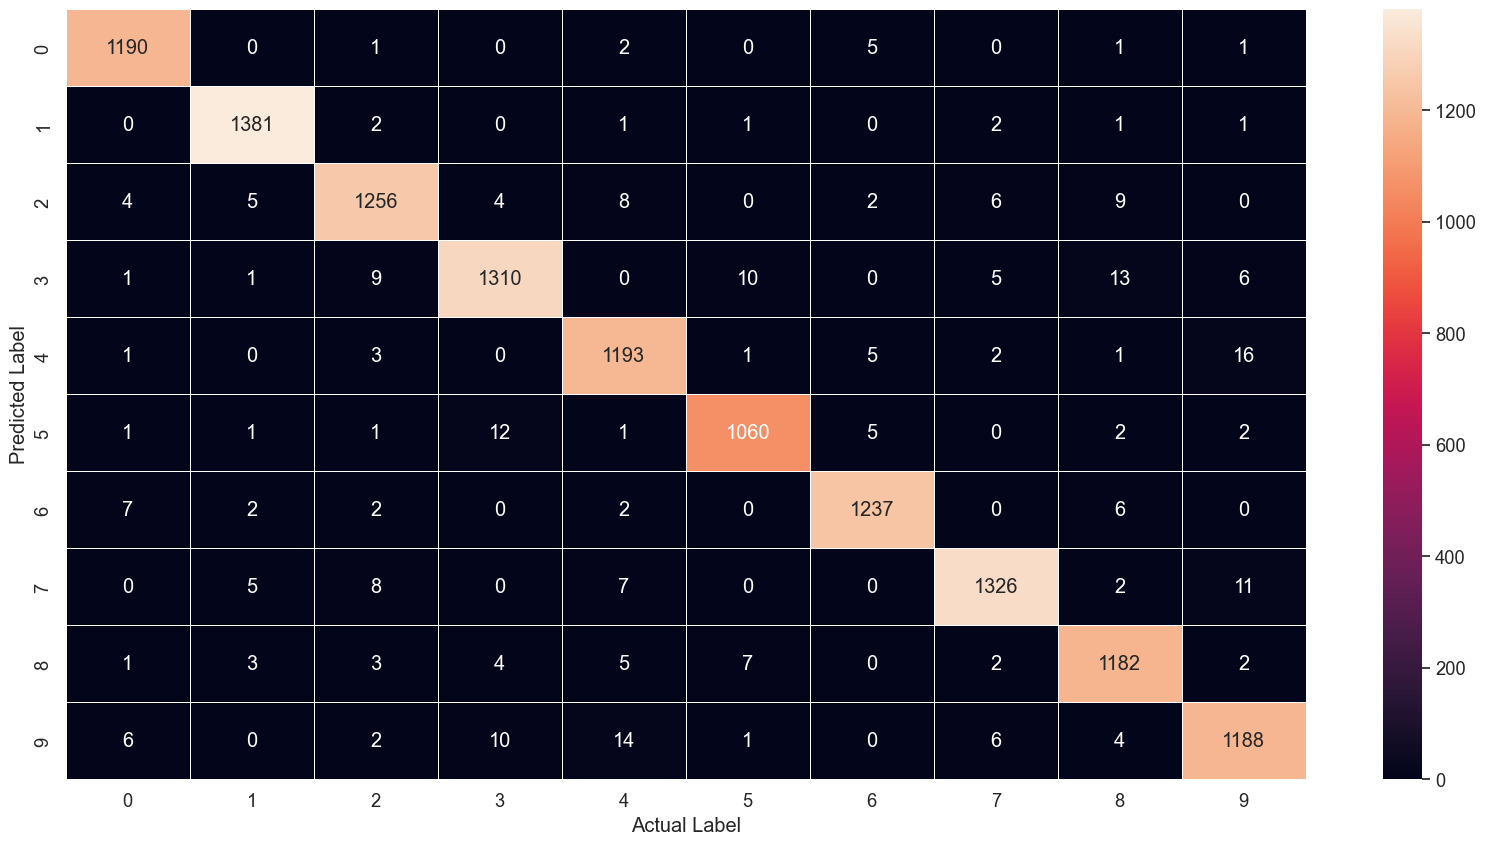

In [37]:
#plotting heatmap for the above found results of confusion matrix

plt.figure(figsize = (20,10))
sns.set(font_scale=1.2)
sns.heatmap(conf_mat2, annot=True, fmt="d", linewidths=.5)
plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")

## 3. Using k-NN Classifier

In [38]:
#creating K nearest neighbor classifier with neighbors value 7

knn = KNeighborsClassifier(n_neighbors=7) 

In [39]:
#fitting the model 

knn.fit(pca_X_train, y_train1)

KNeighborsClassifier(n_neighbors=7)

In [40]:
#printing the accuracy for trained model

print(knn.score(pca_X_train, y_train1))

C:\Users\sudha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9752380952380952


In [41]:
#Calculate the accuracy of tested model

print(knn.score(pca_X_test, y_test1))

C:\Users\sudha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.965


In [42]:
#predicting the model with pca test data

y_pred3 = knn.predict(pca_X_test)

C:\Users\sudha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [43]:
#assigning the predicted model in to a variable to generate confusion matrix

conf_mat3 = confusion_matrix(y_test1, y_pred3)

In [44]:
#printing the accuracy of predicted model
#generating confusion matrix for knn classifier

print(accuracy_score(y_test1, y_pred3))
conf_mat3

0.965


array([[1195,    0,    0,    0,    0,    0,    5,    0,    0,    0],
       [   0, 1384,    1,    0,    0,    0,    3,    0,    0,    1],
       [   8,   13, 1228,    6,    2,    1,    2,   29,    4,    1],
       [   4,    6,    8, 1294,    1,   14,    2,   11,    8,    7],
       [   2,   11,    0,    0, 1176,    0,    5,    2,    0,   26],
       [   1,    1,    0,   25,    1, 1033,   16,    1,    1,    6],
       [   8,    3,    1,    0,    1,    3, 1239,    0,    1,    0],
       [   0,   26,    3,    1,    2,    0,    0, 1312,    0,   15],
       [   1,   16,    5,   17,    2,   21,    4,    2, 1128,   13],
       [   7,    3,    4,   14,   11,    2,    1,   18,    1, 1170]],
      dtype=int64)

In [45]:
#generating classification report

print(classification_report(y_test1, y_pred3))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1200
           1       0.95      1.00      0.97      1389
           2       0.98      0.95      0.97      1294
           3       0.95      0.95      0.95      1355
           4       0.98      0.96      0.97      1222
           5       0.96      0.95      0.96      1085
           6       0.97      0.99      0.98      1256
           7       0.95      0.97      0.96      1359
           8       0.99      0.93      0.96      1209
           9       0.94      0.95      0.95      1231

    accuracy                           0.96     12600
   macro avg       0.97      0.96      0.96     12600
weighted avg       0.97      0.96      0.96     12600



Text(213.25, 0.5, 'Predicted Label')

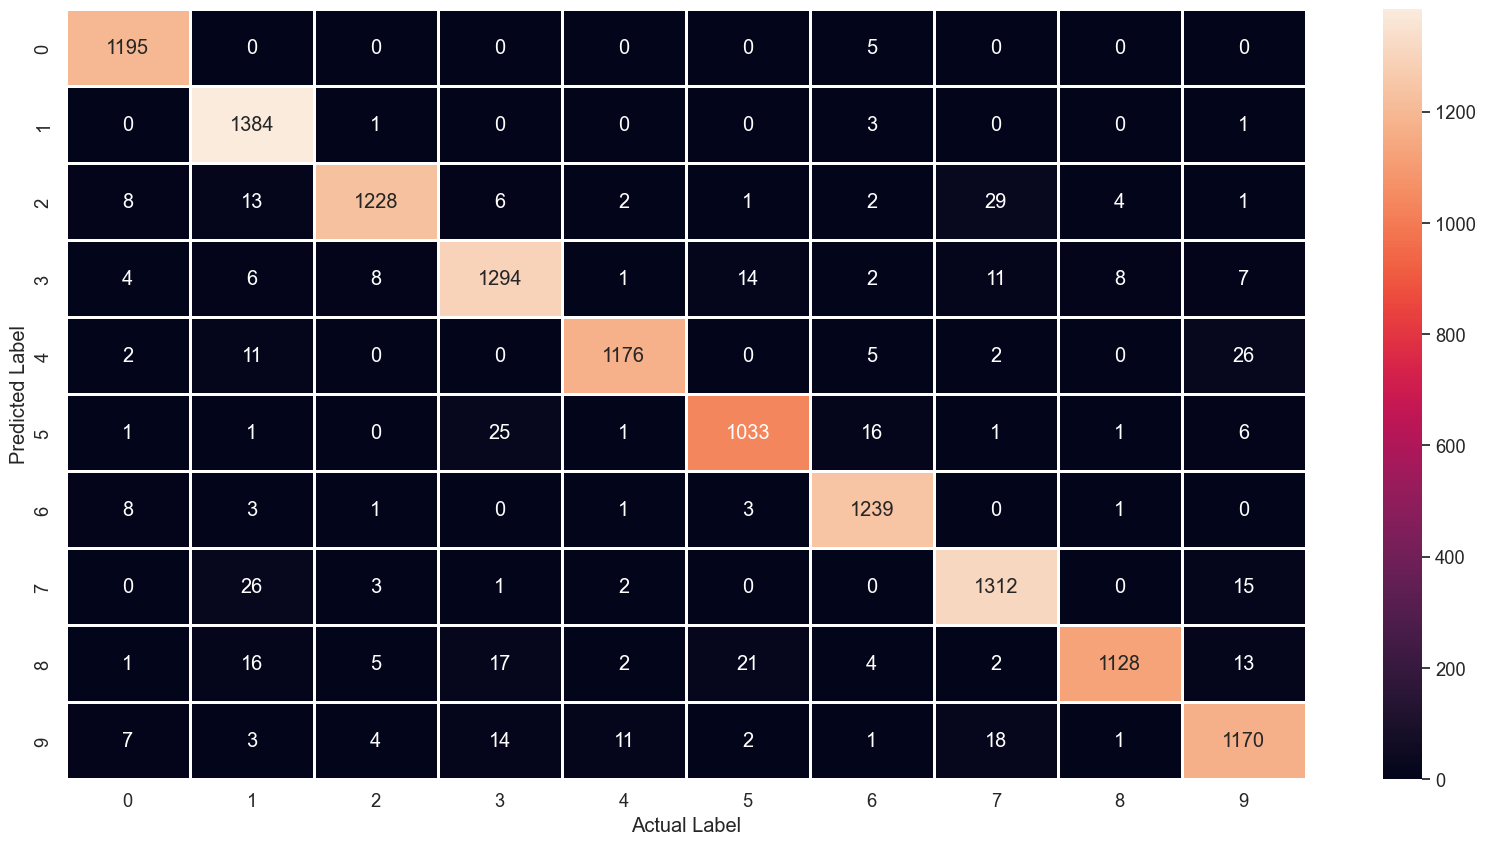

In [46]:
#generating heatmap for the knn confusion matrix

plt.figure(figsize = (20,10))
sns.set(font_scale=1.2)
sns.heatmap(conf_mat3, annot=True, fmt="d", linewidths=1)
plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")

In [47]:
#assigning training and testing accuracies for different k neighbors values

neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

C:\Users\sudha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\sudha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

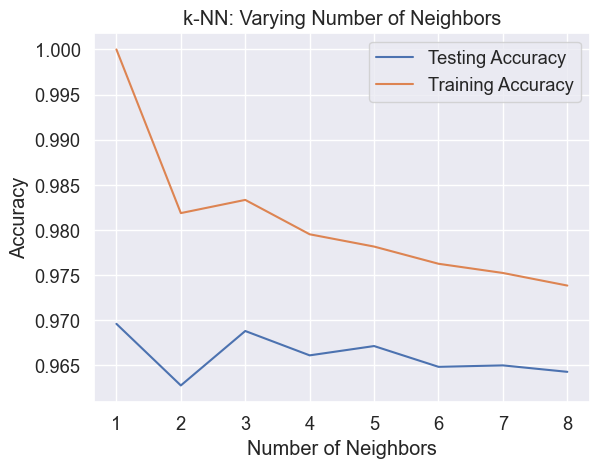

In [48]:
#Creating accuracy plot for k-NN with different k values 

for i, k in enumerate(neighbors):
   #creating classifier plot with k neighbors first
    knn = KNeighborsClassifier(n_neighbors=k)

    #Fitting the model
    knn.fit(pca_X_train,y_train1)
    
    #calculating accuracy on trained data
    train_accuracy[i] = knn.score(pca_X_train, y_train1)

    #calculating accuracy on testing data
    test_accuracy[i] = knn.score(pca_X_test, y_test1)

# Generating accuracies plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()